**Author**: John Pougué-Biyong \
Contact: john.pougue-biyong@maths.ox.ac.uk

**OII Course**: C5.4 Networks \
**Tutor**: Prof. Renaud Lambiotte

*21 January 2026*

This first sheet presents, with solutions, the calculation of basic metrics on networks. Feel free to explore further in any way that you wish!
In particular, you could invetsigate the degree distribution of larger empirical networks, and fit them with a power-law distribution. You could also investigate the correlations between different centrality measures in different networks. Are they different? Why?

# 1. Introduction to networks and basic metrics

In [1]:
!pip install scipy==1.8.1
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 514.9 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 286.5 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1

[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/himesama/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/himesama/Library/Python/3.10/lib/python/site-packages/traitlets/confi

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

A common library for network analysis in Python is [NetworkX](https://networkx.org/). We first [install the library ](https://networkx.org/documentation/stable/install.html) and import it into our notebook.

In [ ]:
!pip install networkx --upgrade
import networkx as nx

## Basics of NetworkX
NetworkX enables to easily create a network, add/remove nodes & edges, and subsequently analyse and draw the network. The library documentation can be found [here](https://networkx.org/documentation/stable/tutorial.html). Let's do it! We first create an undirected network.

In [3]:
G = nx.Graph()

We add 5 edges

In [4]:
list_of_edges = [(1, 2), (1, 3), (1, 4), (2, 3), (4, 2)]
G.add_edges_from(list_of_edges)
print(G.edges) # display the edges in G

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]


We can also add a node as follows

In [5]:
G.add_node(5)
print(G.nodes) # display the nodes in G

[1, 2, 3, 4, 5]


The method `print` provides a short summary of the network...

In [6]:
print(G)

Graph with 5 nodes and 5 edges


... And the `draw` method displays the network.

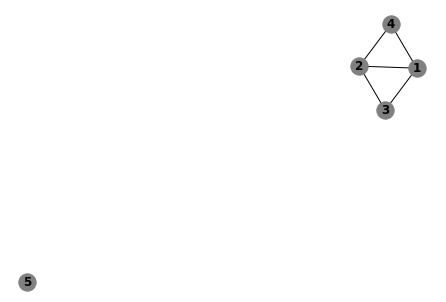

In [7]:
nx.draw(G, with_labels=True, font_weight='bold', node_color='grey')

We will see later how to [enrich the network with node/edge attributes](https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges), and [display the network with all this information](https://networkx.org/documentation/stable/tutorial.html#drawing-graphs).

## Network analysis with NetworkX
Once a network is built, we can analysis it by calling the plethora of [algorithms available in the NetworkX library](https://networkx.org/documentation/stable/reference/algorithms/index.html). As a matter of example, let's analyse the [Zachary's karate club network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


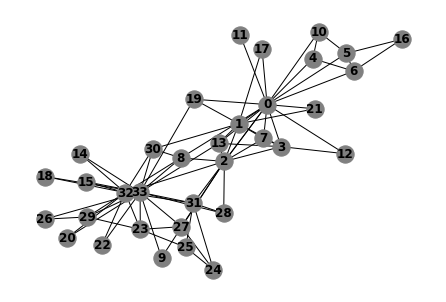

In [8]:
K = nx.karate_club_graph()
print(K)
nx.draw(K, with_labels=True, font_weight='bold', node_color='grey')

### Degree distribution
Let's display the degree distribution of K. We can access the degree of a node `n` simply with `K.degree[n]`.

In [9]:
K.degree[3]

6

Let's compute the degrees then! 

In [10]:
degrees = [K.degree[n] for n in K.nodes]

... And print the degree distribution.

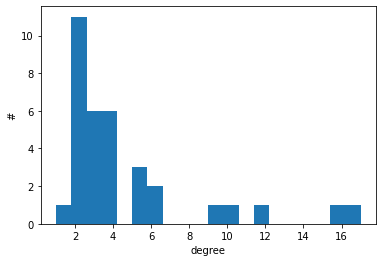

In [11]:
plt.hist(degrees, bins=20)
plt.xlabel('degree')
plt.ylabel('#')
plt.show()

### Centrality
[Centrality measures](https://networkx.org/documentation/stable/reference/algorithms/centrality.html) are easy to compute in NetworkX. Let's compute the correlation between different centrality measures in K.

In [12]:
print('Degree centrality')
degree_cy = nx.degree_centrality(K)
print(degree_cy)

Degree centrality
{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


As we observe, `nx.degree_centrality` computes the degree centrality of each node. We can access the centrality of a specific node from the output dictionary:

In [13]:
degree_cy[6]

0.12121212121212122

We compute other centralities similarly.

In [14]:
katz_cy = nx.katz_centrality(K)
betweenness_cy = nx.betweenness_centrality(K)
closeness_cy = nx.closeness_centrality(K)

We can then compute the [correlations](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between centrality measures.

In [15]:
centralities = [list(degree_cy.values()), 
                list(katz_cy.values()), 
                list(betweenness_cy.values()), 
                list(closeness_cy.values())]

correlations = np.corrcoef(np.array(centralities))
correlations = pd.DataFrame(correlations, 
                            columns = ['degree', 'katz', 'betweenness', 'closeness'], 
                            index = ['degree', 'katz', 'betweenness', 'closeness'])
correlations

,degree,katz,betweenness,closeness
degree,1.000000,0.966511,0.914643,0.771591
katz,0.966511,1.000000,0.865582,0.877428
betweenness,0.914643,0.865582,1.000000,0.717945
closeness,0.771591,0.877428,0.717945,1.000000


You can observe correlations between the centrality measures on this graph. What about on other graphs? And is there a correlation with other centrality measures like the clustering coefficient for instance?

## Storing network data in Python
So far, we have seen how to store edge (network) data in a NetworkX graph object `nx.Graph`. We will now see that there are other ways to store edge data, depending on the needs and applications. Let's start with a small network of 7 edges.

In [16]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (4, 2), (2, 5), (5, 6)])
print(G) 

Graph with 6 nodes and 7 edges


### Dense matrix
A natural way to describe a network G is with its adjacency matrix A. The entry `(i, j)` of A is non-zero if nodes `i`and `j` are connected. The adjacency matrix is usually stored in a *dense matrix* where all entries are specified.

In [17]:
A = nx.adjacency_matrix(G)
A.todense()

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]])

This representation is easy to read when the network is small. However, because most networks are sparse, the adjacency matrix contains a lot of zero-entries which use memory storage unnecessarily, especially in the case of large networks. An advantage of a matrix representation is that it opens the toolbox of linear algebra for the analysis of networks. As we will see later, many properties of dynamics on networks can be understood by looking at a matrix describing the graph. For now, as an example, we consider the dominant eigenvector of the adjacency matrix, that is the one associated to its largest eigenvalue, which corresponds to the so-called Eigenvector centrality.

Calculate on Karate the Eigenvector centrality from the matrix directly and from [networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html), and show that it gives the same answer.

### Sparse matrix
An alternative is to use a sparse representation of the adjacency matrix. This *sparse matrix* only specifies non-zero entries, which reduces considerably the memory usage for large networks.

In [18]:
A = nx.adjacency_matrix(G)
print(A)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 1)	1
  (4, 5)	1
  (5, 4)	1


We can perform operations on sparse matrices as we would with dense matrices, e.g, $A^2 - A =$

In [19]:
print(A.dot(A) - A)

  (0, 0)	3
  (0, 4)	1
  (0, 1)	1
  (1, 4)	-1
  (1, 1)	4
  (1, 0)	1
  (1, 5)	1
  (2, 2)	2
  (2, 3)	2
  (2, 4)	1
  (3, 2)	2
  (3, 3)	2
  (3, 4)	1
  (4, 5)	-1
  (4, 1)	-1
  (4, 0)	1
  (4, 2)	1
  (4, 3)	1
  (4, 4)	2
  (5, 4)	-1
  (5, 1)	1
  (5, 5)	1


... which reads, in a dense form, as:

In [20]:
(A.dot(A) - A).todense()

array([[ 3,  1,  0,  0,  1,  0],
       [ 1,  4,  0,  0, -1,  1],
       [ 0,  0,  2,  2,  1,  0],
       [ 0,  0,  2,  2,  1,  0],
       [ 1, -1,  1,  1,  2, -1],
       [ 0,  1,  0,  0, -1,  1]])

Calculate the dominant eigenvector from the sparse matrix as well ([hint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html)).

### Dataframe
Eventually, a convenient format to import/export edge data is the [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [21]:
df = nx.to_pandas_edgelist(G)
df

,source,target
0,1,2
1,1,3
2,1,4
3,2,3
4,2,4
5,2,5
6,5,6


As we can see, the `DataFrame` provides the source and target nodes of each edge. Running the following cell will export the DataFrame into a `.csv` file in the current directory (where this notebook is located in your computer).

In [22]:
df.to_csv('edge_data_example.csv', index=False)

We can also import data from .txt and .csv files into a `DataFrame`. For instance, in the following cell, we import a [research collaboration network](https://snap.stanford.edu/data/ca-GrQc.html) stored into a .txt file in the current directory.

In [23]:
arxiv_collaborations = pd.read_csv('arxiv_collaborations.txt', 
                                   sep = "\t", 
                                   names = ['author1','author2'], 
                                   skiprows = 4)

Let's inspect the data.

In [24]:
arxiv_collaborations.sample(5)

,author1,author2
12830,1653,12781
24766,21436,23915
15081,8224,7264
7366,5655,18585
20895,22503,16647


In the following cell, we import a [social network collected from a streaming platform's API](https://snap.stanford.edu/data/feather-deezer-social.html) stored into a .csv file in the current directory.

In [25]:
deezer_follows = pd.read_csv('deezer_follows.csv', 
                             index_col = False)
deezer_follows.sample(5)

,node_1,node_2
12413,1757,11854
70072,14076,14364
57741,10508,25713
22900,3456,4684
30381,4671,18541


We build the graph from the dataframe of follow links.

In [ ]:
deezer_graph = pd.from_pandas_edgelist(deezer_follows, source='node_1', target='node_2')

The [documentation](https://networkx.org/documentation/stable/reference/readwrite/index.html) provides syntax to import different format files (graphml, json, etc.) directly into networkX, without importing the edge list with Pandas.

### Summary
- Storing our edge data in a **DataFrame** is convenient to import/export it into/from our notebook. 
- The **dense matrix** is convenient to visualise small adjacency matrices. 
- **Sparse matrices** are convenient to make operations with large adjacency matrices, for instance, when we want to model dynamic processes on networks.
- Using a **Graph object from NetworkX** is the way to go if we want to analyse or apply algorithms to a network (e.g. centrality, random walks...).

## Dijsktra's algorithm
A metric one often wonders about is the shortest distance between two nodes in a graph. The popular [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) computes the distance between any two nodes in an efficient way. As we can expect, it is already provided in NetworkX.

In [26]:
path = nx.shortest_path(G, source=3, target=6)
path

[3, 2, 5, 6]

It seems that the shortest path to go from node 3 to node 6 is 3 -> 2 -> 5 -> 6, of length 3. Let's check this by plotting the network.

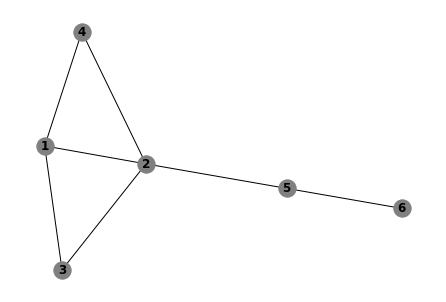

In [27]:
nx.draw(G, with_labels=True, font_weight='bold', node_color='grey')

It is indeed. Now let's try to implement the Dijsktra's algorithm on our own. In case you do not find a solution, you can take inspiration [here](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Algorithm). 

In [28]:
sourceNode = 3
targetNode = 6
# store G's nodes and neighbours
nodes = list(G.nodes)
neighbours = {src: {tgt: 1 for tgt in G.neighbors(src)} for src in nodes}
# record unvisited and visited nodes
visited = {}
unvisited = {node: None for node in nodes}
unvisited[sourceNode] = 0
# initialise relevant variables
currentNode = sourceNode
currentDistance = 0
# keep visiting nodes to update their distance to the source, as long as there are still nodes to visit 
while True:
    for neighbour, distance in neighbours[currentNode].items():
        if neighbour not in unvisited: 
            continue
        newDistance = currentDistance + distance
        if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
            unvisited[neighbour] = newDistance
    visited[currentNode] = currentDistance
    del unvisited[currentNode]
    if len(unvisited) == 0:
        break
    candidates = [(node, value) for node, value in unvisited.items() if value]
    currentNode, currentDistance = sorted(candidates, key = lambda x: x[1])[0]

print('Distance from', sourceNode, 'to', targetNode, ':',
      visited[targetNode]) 

Distance from 3 to 6 : 3


We recover the same value as with NetworkX. We can change the source and target nodes to check that the results are consistent in all cases.

## *Bonus*: number of walks between two nodes
The Dijsktra's algorithm uses a heuristic to find the shortest path between 2 nodes in a connected graph. Another important property to quantify the indirect relation between two nodes is the number of walks between them. The number of walks of length k between nodes $i$ and $j$ is the $(i,j)$-entry of the $k$-th power of the adjacency matrix $A$, i.e  $A^k(i, j)$.

Let's verify this property for any graph of our choice.

In [29]:
A = nx.adjacency_matrix(G)
print(A)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 1)	1
  (4, 5)	1
  (5, 4)	1


In [31]:
print(A.dot(A).dot(A))

  (0, 5)	1
  (0, 1)	6
  (0, 4)	2
  (0, 3)	5
  (0, 2)	5
  (0, 0)	4
  (1, 0)	6
  (1, 3)	6
  (1, 2)	6
  (1, 1)	4
  (1, 4)	5
  (2, 4)	1
  (2, 0)	5
  (2, 3)	2
  (2, 2)	2
  (2, 5)	1
  (2, 1)	6
  (3, 4)	1
  (3, 0)	5
  (3, 3)	2
  (3, 2)	2
  (3, 5)	1
  (3, 1)	6
  (4, 3)	1
  (4, 2)	1
  (4, 0)	2
  (4, 5)	2
  (4, 1)	5
  (5, 3)	1
  (5, 2)	1
  (5, 0)	1
  (5, 4)	2
